# Solar Power

## Business Understanding

### Stakeholder:
- 
-
-

### True Business Problem:
With a recent push for cleaner renewable energy (company name) is seeing an increase in solar panel request. (company name) is looking the potential of solar power and how it can meet the demands of the current power consumption. 

# Data Understanding

In [1]:
# imports
import pandas as pd
import numpy as np

from datetime import datetime as dt
import requests 
from secret import keys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api_key = keys.API_KEY
# pulling in the API key from the website

### Params 
- Below I will set the parameters and pull in data from three different time frames until I get a reasonable amount of data

In [3]:
base_url = 'https://api.eia.gov/v2/electricity/rto/fuel-type-data/data'

In [4]:
params = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]": "SUN", # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2022-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29"
}

# the exact same parameters will be used for future data acquisitions. 
            ## The time frame will be the only change within the code. 

In [5]:
resp = requests.get(base_url, params = params)

In [6]:
resp.status_code
# receiving a 200 means a successful response from the `base_url`

200

In [7]:
data = resp.json()


In [8]:
data['response'].keys()

dict_keys(['query execution', 'count query execution', 'total', 'dateFormat', 'frequency', 'data', 'description'])

In [9]:
df_1 = pd.DataFrame(data['response']['data'])
df_1

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2022-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,249,megawatthours
1,2022-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,27,megawatthours
2,2022-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours
3,2022-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours
4,2022-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours
...,...,...,...,...,...,...,...
667,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1099,megawatthours
668,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1006,megawatthours
669,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,798,megawatthours
670,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,765,megawatthours


In [10]:
params_2 = {
    'api_key': api_key,
    "frequency": "hourly",
    "data[]": "value",
    "facets[fueltype][]": "SUN",
    "facets[respondent][]": "SOCO",
    "start": "2021-07-01",
    "end": "2022-12-31"
}

In [11]:
resp_2 = requests.get(base_url, params = params_2)

In [12]:
resp_2.status_code

200

In [13]:
data_2 = resp_2.json()

In [14]:
df_2 = pd.DataFrame(data_2['response']['data'])
df_2

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2021-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,177,megawatthours
1,2021-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,32,megawatthours
2,2021-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
3,2021-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
4,2021-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
...,...,...,...,...,...,...,...
4995,2022-01-25T03,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
4996,2022-01-25T04,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,-2,megawatthours
4997,2022-01-25T05,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
4998,2022-01-25T06,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours


In [15]:
params_3 = {
    'api_key': api_key,
    "frequency": "hourly",
    "data[]": "value",
    "facets[fueltype][]": "SUN",
    "facets[respondent][]": "SOCO",
    "start": "2022-01-01",
    "end": "2022-06-30"
}

In [16]:
resp_3 = requests.get(base_url, params = params_3)

In [17]:
resp_3.status_code

200

In [18]:
data_3 = resp_3.json()

In [19]:
df_3 = pd.DataFrame(data_3['response']['data'])
df_3

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2022-01-01T00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
1,2022-01-01T01,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
2,2022-01-01T02,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
3,2022-01-01T03,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
4,2022-01-01T04,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
...,...,...,...,...,...,...,...
4315,2022-06-29T19,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,2383,megawatthours
4316,2022-06-29T20,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1886,megawatthours
4317,2022-06-29T21,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1347,megawatthours
4318,2022-06-29T22,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,670,megawatthours


### Creating the dataframe
- I will take the three groups of data from of above and pull them into one dataframe using the `concatenate` method.

In [20]:
frames = [df_1, df_2, df_3]

In [21]:
result = pd.concat(frames)

In [22]:
df = pd.concat(frames)
df

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2022-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,249,megawatthours
1,2022-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,27,megawatthours
2,2022-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours
3,2022-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours
4,2022-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours
...,...,...,...,...,...,...,...
4315,2022-06-29T19,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,2383,megawatthours
4316,2022-06-29T20,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1886,megawatthours
4317,2022-06-29T21,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1347,megawatthours
4318,2022-06-29T22,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,670,megawatthours


## Data Exploring and Cleaning

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 4319
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   period           9992 non-null   object
 1   respondent       9992 non-null   object
 2   respondent-name  9992 non-null   object
 3   fueltype         9992 non-null   object
 4   type-name        9992 non-null   object
 5   value            9992 non-null   int64 
 6   value-units      9992 non-null   object
dtypes: int64(1), object(6)
memory usage: 624.5+ KB


In [24]:
df.isna().sum()

period             0
respondent         0
respondent-name    0
fueltype           0
type-name          0
value              0
value-units        0
dtype: int64

In [25]:
df['period'] = pd.to_datetime(df['period'])
# used the pandas to_datetime funtion switch the Dtype of the period column

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 4319
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   period           9992 non-null   datetime64[ns]
 1   respondent       9992 non-null   object        
 2   respondent-name  9992 non-null   object        
 3   fueltype         9992 non-null   object        
 4   type-name        9992 non-null   object        
 5   value            9992 non-null   int64         
 6   value-units      9992 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 624.5+ KB


In [27]:
df = df.set_index('period')
df.head()

,respondent,respondent-name,fueltype,type-name,value,value-units
period,,,,,,
2022-07-01 00:00:00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,249,megawatthours
2022-07-01 01:00:00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,27,megawatthours
2022-07-01 02:00:00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours
2022-07-01 03:00:00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours
2022-07-01 04:00:00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1,megawatthours


Now I want to explore and see if the Datetime index worked.

In [36]:
df['respondent-name'].value_counts()

Southern Company Services, Inc. - Trans    9992
Name: respondent-name, dtype: int64

In [28]:
df.index[0]

Timestamp('2022-07-01 00:00:00')

In [29]:
df.index[0].month

7

In [30]:
df.index[0].year

2022

In [31]:
df.index[0].day

1

In [32]:
df = df.sort_index()
# sorting the data by date using sort_index

In [39]:
df_resampled = df.resample('D').sum()

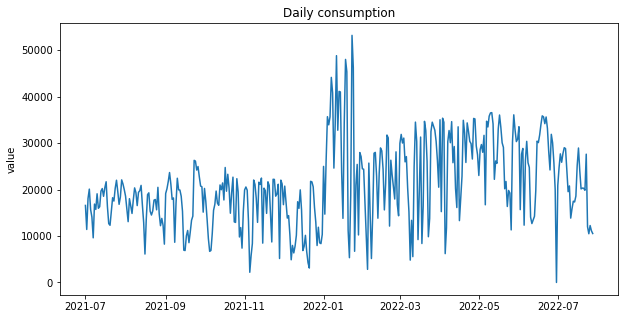

In [40]:
# Plot our new df_resampled
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_resampled)
ax.set_title('Daily consumption')
ax.set_ylabel('value');

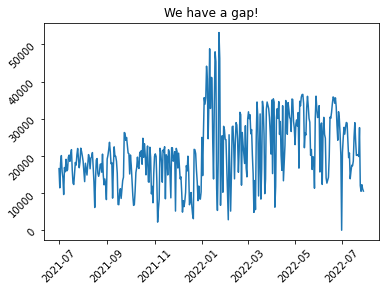

In [42]:
fig, ax = plt.subplots()
ax.plot(df_resampled)
ax.tick_params(rotation=45)
ax.set_title('We have a gap!');
